In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,LSTM
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [5]:
data = pd.read_csv('international-airline-passengers.csv',usecols =[1],skipfooter =3)
data.columns = ['Passengers']

In [6]:
data.head(10)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


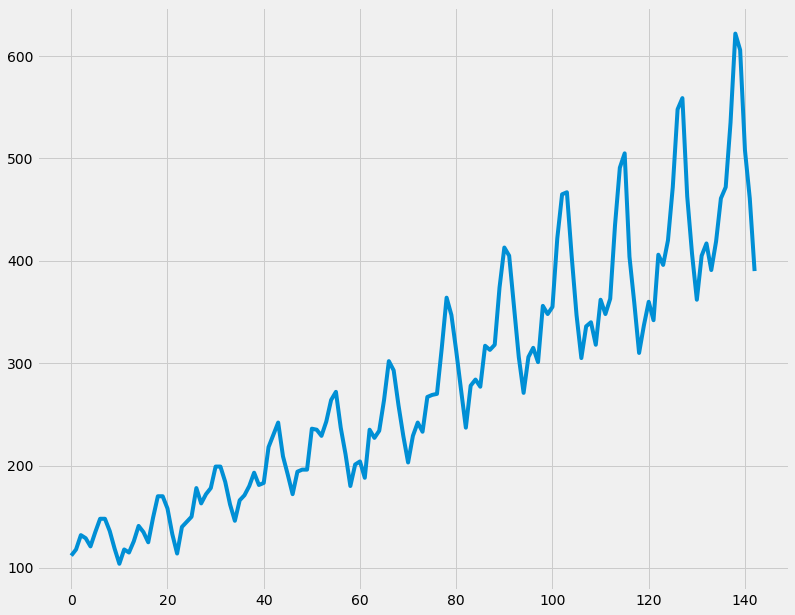

In [11]:
plt.figure(figsize=(12,10))
plt.plot(data.Passengers)

In [12]:
df = data['Passengers'].values
df = np.array(df).reshape(-1,1)
df[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]], dtype=int64)

In [13]:
sc = MinMaxScaler(feature_range = (0,1))
df = sc.fit_transform(df)
df[:10]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [14]:
# Splitting the data into training and test set
train_size = int(len(df)*0.80)
test_size = len(df) - train_size
train = df[0:train_size,:]
test =df[train_size:len(df),:]
print(len(train),len(test))

114 29


In [16]:
def create_dataset(S, look_back =1):
    dataX, dataY = [],[]
    for i in range(len(S)-look_back-1):
        dataX.append(S[i:(i+look_back),0])
        dataY.append(S[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [17]:
xtrain,ytrain = create_dataset(train, look_back = 1)
xtrain.shape,ytrain.shape

((112, 1), (112,))

In [18]:
xtest,ytest = create_dataset(test, look_back=1)
xtest.shape,ytest.shape

((27, 1), (27,))

In [21]:
xtrain = np.reshape(xtrain,(xtrain.shape[0],1,xtrain.shape[1]))
xtest = np.reshape(xtest, (xtest.shape[0],1,xtest.shape[1]))

In [22]:
look_back = 1
model = Sequential()
model.add(LSTM(128, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(xtrain, ytrain, epochs=100, batch_size=2,validation_data=(xtest,ytest), verbose=2)

Train on 112 samples, validate on 27 samples
Epoch 1/100
 - 6s - loss: 0.0431 - val_loss: 0.1133
Epoch 2/100
 - 0s - loss: 0.0156 - val_loss: 0.0770
Epoch 3/100
 - 0s - loss: 0.0123 - val_loss: 0.0537
Epoch 4/100
 - 0s - loss: 0.0091 - val_loss: 0.0315
Epoch 5/100
 - 0s - loss: 0.0061 - val_loss: 0.0251
Epoch 6/100
 - 0s - loss: 0.0043 - val_loss: 0.0142
Epoch 7/100
 - 0s - loss: 0.0034 - val_loss: 0.0118
Epoch 8/100
 - 0s - loss: 0.0034 - val_loss: 0.0114
Epoch 9/100
 - 0s - loss: 0.0027 - val_loss: 0.0104
Epoch 10/100
 - 0s - loss: 0.0027 - val_loss: 0.0105
Epoch 11/100
 - 0s - loss: 0.0030 - val_loss: 0.0104
Epoch 12/100
 - 0s - loss: 0.0029 - val_loss: 0.0108
Epoch 13/100
 - 0s - loss: 0.0030 - val_loss: 0.0107
Epoch 14/100
 - 0s - loss: 0.0031 - val_loss: 0.0105
Epoch 15/100
 - 0s - loss: 0.0033 - val_loss: 0.0105
Epoch 16/100
 - 0s - loss: 0.0026 - val_loss: 0.0107
Epoch 17/100
 - 0s - loss: 0.0030 - val_loss: 0.0106
Epoch 18/100
 - 1s - loss: 0.0026 - val_loss: 0.0104
Epoch 19/1

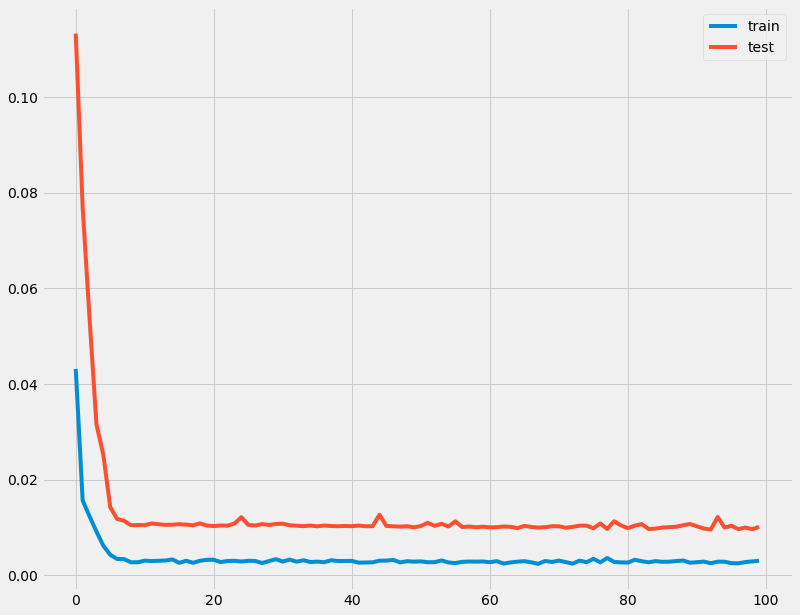

In [23]:
plt.figure(figsize = (12,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [24]:
pred = model.predict(xtest)
pred = sc.inverse_transform(pred)
pred[:10]

array([[473.38083],
       [486.26672],
       [392.76248],
       [350.7424 ],
       [304.78348],
       [330.13184],
       [351.67822],
       [334.81967],
       [394.62543],
       [385.30676]], dtype=float32)

In [25]:
ytest = np.array(ytest).reshape(-1,1)
ytest = sc.inverse_transform(ytest)
ytest[:10]

array([[505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.]])

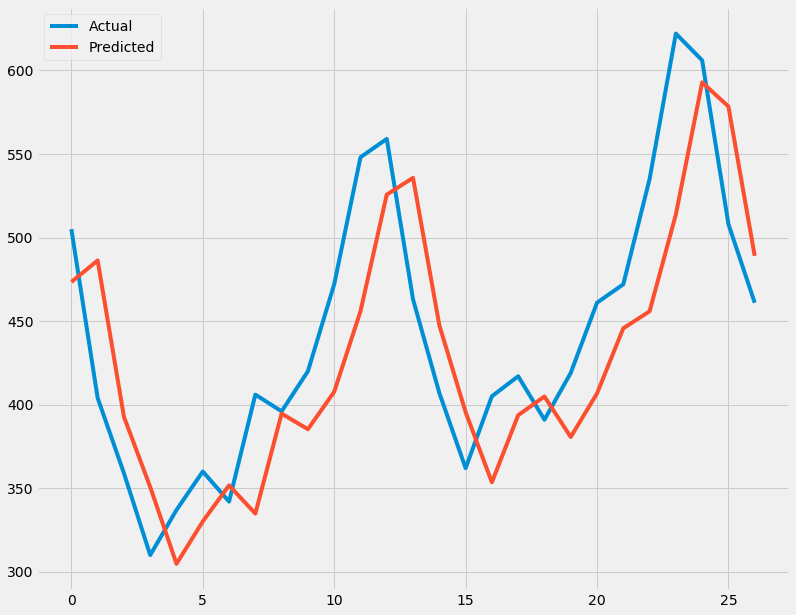

In [26]:
plt.figure(figsize = (12,10))
plt.plot(ytest, label ='Actual')
plt.plot(pred, label ='Predicted')
plt.legend()